
# **Summary and Discussion**


> I have  implemented the **Logistic Regression model from scratch using numpy and pandas only** , for classifying the heart disease dataset. The steps included data preprocessing, model initialization, training, and evaluating its performance.

# **Data Preprocessing**

> After checking for nulls and removed the duplicates, I have applied feature scaling by standardizing them to have a mean of 0 and std of 1, scaling the data is an essential step for optimizing and to prevent the features with larger values from dominating the process



> then I randomly shuffled the data and splitted it into training and testing with the ratio (80:20)


#**Model Implementation**
*The logistic regression model was implemented  as follows:*

1.   Initialize the weights and bias = 0
2.   mapping the linear combination (z) into 0 and 1 by using the **Sigmoid function**.
1.   Loss funciton : The binary cross-entropy loss function was implemented to measure the performance.
2.   Gradient Descent:  to update the weights and bias iteratively. The learning rate was set to 0.05, and the model was trained for 5000 epochs.

During Training process, I  printed the loss in each interval to monitor the model while leraning.
After predicting and evaluating the model, the accuracy where calculated as follows:
* **Training Accuracy: 85.12%**
* **Testing Accuracy: 81.96%**


## **Some Notes:**
* The initial loss was high, but it decreased significantly after each epoch, and that indicated that the model was learning.
* But after several epochs the loss remained the same , which means that the model (gradient descent) has reached a local minimum.
* since the final accuracies were high, that indicates that the model was generalized
* I applied hyper-parameter tuning to choose the suitable learning rate and epochs

# **Code**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


I am Checking here for the nulls, duplicates, data balance

In [ ]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates()
# print(df.duplicated().sum())

1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0




1. **Standardizing the data (Normalizing)**
2. **Shuffling**
1. **splitting it into train & test**



In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [ ]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [ ]:
np.random.seed(42)
indices= np.arange(x.shape[0])
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
sizeOfTrain = int(0.8*x.shape[0]) # 0.8 is the ratio of training sample vs the test 0.2

In [ ]:
#  splitting the data(training :from the begining till the size I have determined, test is the rest)
xTrain = x[:sizeOfTrain]
xTest = x[sizeOfTrain:]
yTrain = y[:sizeOfTrain]
yTest = y[sizeOfTrain:]

In [ ]:
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(242, 13) (61, 13) (242,) (61,)


In [ ]:
# # standardizaiton : mean of 0 and  std of 1
# def standardization(x):
#     for i in range(x.shape[1]):
#         x[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])
# standardization(xTrain)
# standardization(xTest)

## **Steps:**
1. initialize w weights and  b bias.
2. sigmoid fn.
1. The loss fn. (binary cross-entropy).
2.  gradient descent
1. training and predictions


In [ ]:
def initialization(numOfX):
  w = np.zeros(numOfX)
  b = 0
  return w, b

In [ ]:
def sigmoid(z):
  z = 1/ (1+np.exp(-z))
  return z

#  z is the linear combination that will be calculated as x*W + b

In [ ]:
def lossFunction(y, y_hat):
    m = y.shape[0]
    loss = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) *np.log(1 - y_hat))
    return loss

In [ ]:
# These lists to record the losses and accuracies while learning
# I will use them just for visualization at the end
losses = []
train_accuracies = []
test_accuracies = []

In [ ]:
def GD(x, y, w, b, lr, epochs, xTest, yTest):
  m = x.shape[0] # no. of rows
  for i in range(epochs):
    z = np.dot(x, w)+b
    y_hat = sigmoid(z)
    dw = (1/m)* np.dot(x.T, (y_hat - y))
    db = (1/m)* np.sum(y_hat - y)

    # updating weights:
    w = w - lr* dw
    b = b - lr*db

    if i % 1000 == 0:
      loss = lossFunction(y, y_hat)
      losses.append(loss)

      y_train_hat = Predict(x, w, b)
      y_test_hat = Predict(xTest, w, b)

      train_accuracy = np.mean(y_train_hat == y) * 100
      test_accuracy = np.mean(y_test_hat == yTest) * 100

      train_accuracies.append(train_accuracy)
      test_accuracies.append(test_accuracy)

      print(f"In epoch {i}: the loss = {loss}")

  return w, b


In [ ]:
def Predict(x, w, b):
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)
    y_class = (y_hat >= 0.5).astype(int)
    return y_class


In [ ]:
n = xTrain.shape[1]
w, b = initialization(n)


# setting our hyperparameters:
lr = 0.05      # learning rate
epochs = 5000

w, b = GD(xTrain, yTrain, w, b, lr, epochs ,xTest, yTest)


In epoch 0: the loss = 0.6931471805599453
In epoch 1000: the loss = 0.3576241075514691
In epoch 2000: the loss = 0.35753965497698176
In epoch 3000: the loss = 0.35753897233320564
In epoch 4000: the loss = 0.3575389635231471


## **Evaluating**

In [ ]:
y_train_hat = Predict(xTrain, w, b)
y_test_hat = Predict(xTest, w, b)

train_accuracy = np.mean(y_train_hat == yTrain) * 100

test_accuracy = np.mean(y_test_hat == yTest) * 100

print(f"Training Accuracy: {train_accuracy}%")
print(f"Testing Accuracy: {test_accuracy}%")

Training Accuracy: 85.53719008264463%
Testing Accuracy: 86.88524590163934%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(yTest, y_test_hat)
recall = recall_score(yTest, y_test_hat)
f1 = f1_score(yTest, y_test_hat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.8529411764705882
Recall: 0.90625
F1-score: 0.8787878787878787


# **Some Visualization**

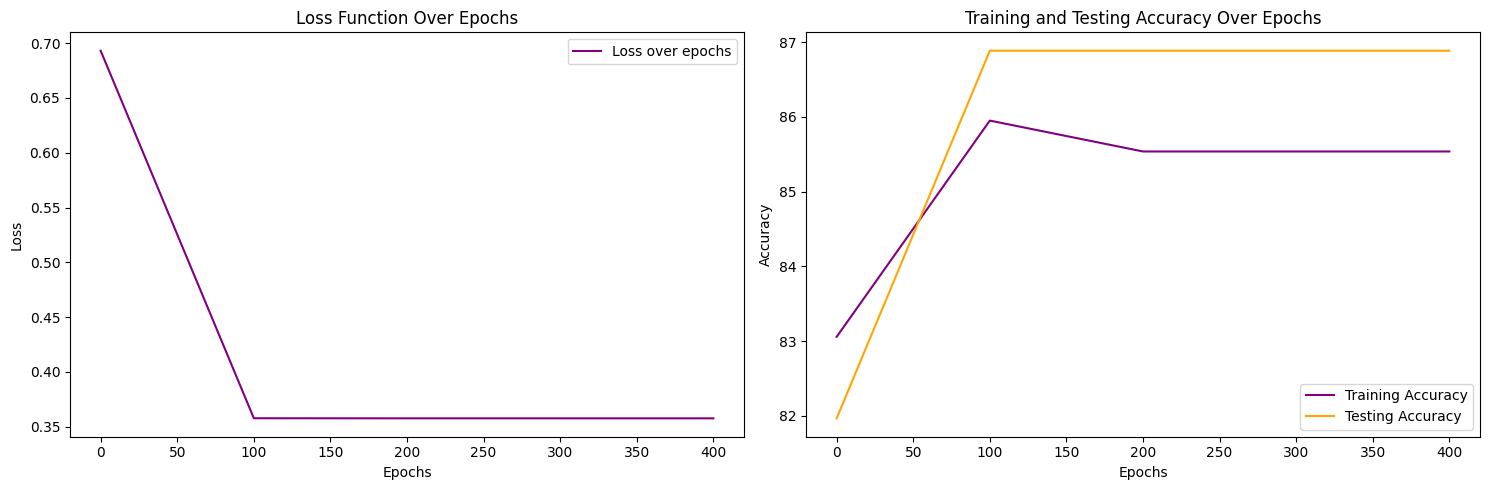

In [ ]:
# Visualization of loss and accuracy over the epochs
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(0, len(losses) * 100, 100), losses, label='Loss over epochs', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(0, len(train_accuracies) * 100, 100), train_accuracies, label='Training Accuracy', color='purple')
plt.plot(range(0, len(test_accuracies) * 100, 100), test_accuracies, label='Testing Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Logistic/sigmoid function applied')

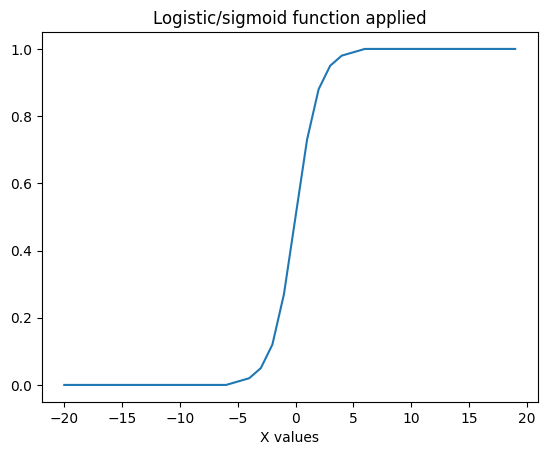

In [ ]:
#  x and y  values after applying the sigmoid :

x= np.arange(-20,20)
y= np.round(sigmoid(x),2)

plt.plot(x, y)
plt.xlabel('X values')
plt.title('Logistic/sigmoid function applied')

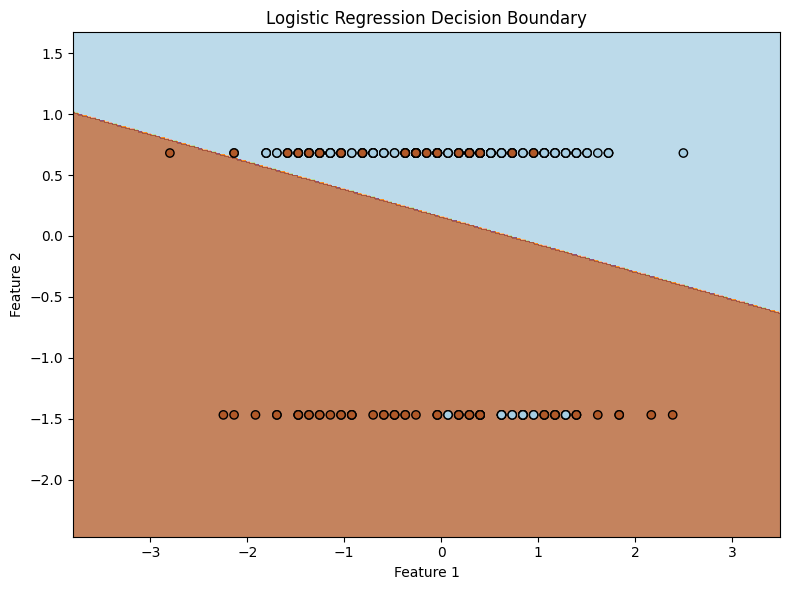

In [ ]:
# Visualization of decision boundary
plt.figure(figsize=(8, 6))

X_set, y_set = xTrain[:, :2], yTrain  # Only visualize the first two features
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

Z = Predict(np.array([X1.ravel(), X2.ravel()]).T, w[:2], b).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=plt.cm.Paired)
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolor='k', marker='o', cmap=plt.cm.Paired)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
